In [1]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
#Loading data 
df=pd.read_csv("C:/Users/Krishna Sharma/OneDrive/Desktop/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
#data analysis for Education wise Loan Status
df_education=df.groupby([' education',' loan_status'])[' loan_status'].agg("count")

In [13]:
df_education

 education     loan_status
Graduate      Approved        1339
              Rejected         805
Not Graduate  Approved        1317
              Rejected         808
Name:  loan_status, dtype: int64

In [15]:
df_edu_final=df_education.reset_index(name='loan_status_count')

In [17]:
df_edu_final

,education,loan_status,loan_status_count
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


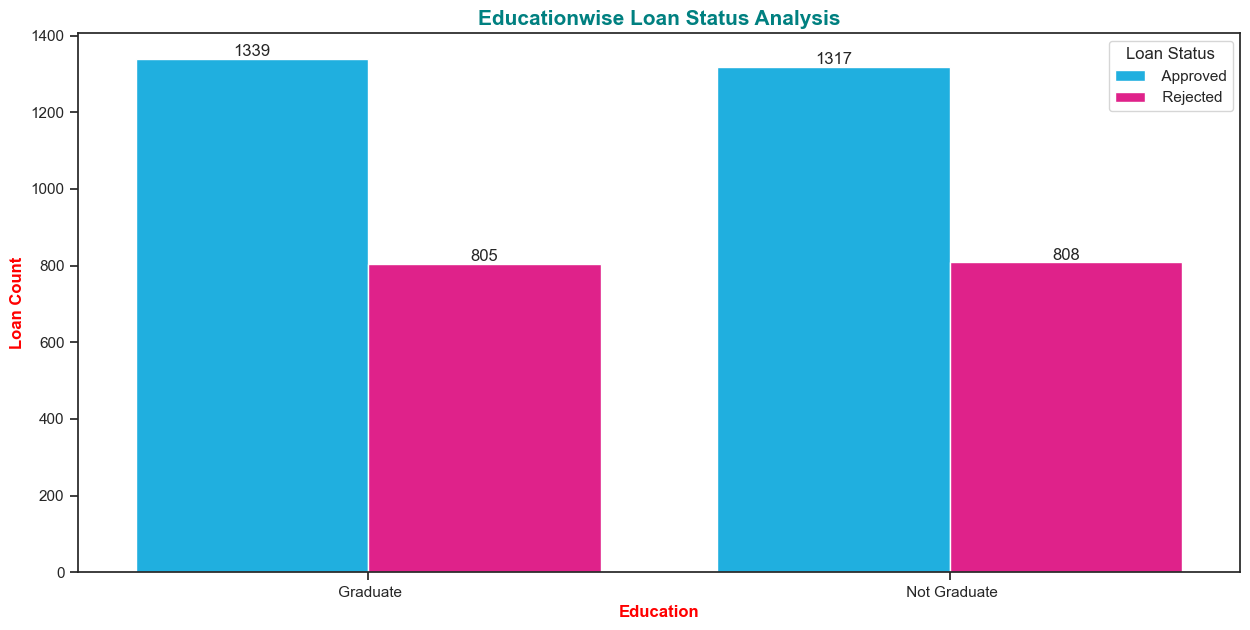

In [19]:
#Ploting Educationwise Loan status
sns.set_style("white")
sns.set_theme(style="ticks")
plt.figure(figsize=(15,7))
palette_edu=['deepskyblue','xkcd:hot pink']
ax=sns.barplot(x=' education',y='loan_status_count',hue=' loan_status',data=df_edu_final,palette=palette_edu)
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel("Education",fontweight="bold",size=12,color="red")
ax.set_ylabel("Loan Count",fontweight="bold",size=12,color="red")

plt.title("Educationwise Loan Status Analysis",size=15,fontweight="bold",color="teal")
plt.legend(title="Loan Status")
plt.show()

In [21]:
df_approved=df[(df[' loan_status']==' Approved')]

In [23]:
df_rejected=df[(df[' loan_status']==' Rejected')]

In [25]:
df_approved_final=df_approved.groupby([' self_employed'])[' self_employed'].agg("count").to_frame()

In [27]:
lstapproved_labels=df_approved_final.index.to_list()

In [29]:
lstapproved_values=df_approved_final[' self_employed'].to_list()

In [31]:
#updating values of self-employed data list of approved data
lstapproved_labels=[w.replace('Yes','Self-Employed') for w in lstapproved_labels]
lstapproved_labels=[w.replace('No','Not Self-Employed') for w in lstapproved_labels]

In [33]:
df_rejected_final=df_rejected.groupby([' self_employed'])[' self_employed'].agg("count").to_frame()

In [35]:
lstrejected_labels=df_rejected_final.index.to_list()

In [37]:
lstrejected_values=df_rejected_final[' self_employed'].to_list()

In [39]:
lstrejected_labels

[' No', ' Yes']

Text(0.5, 1.0, 'Rejected Loans')

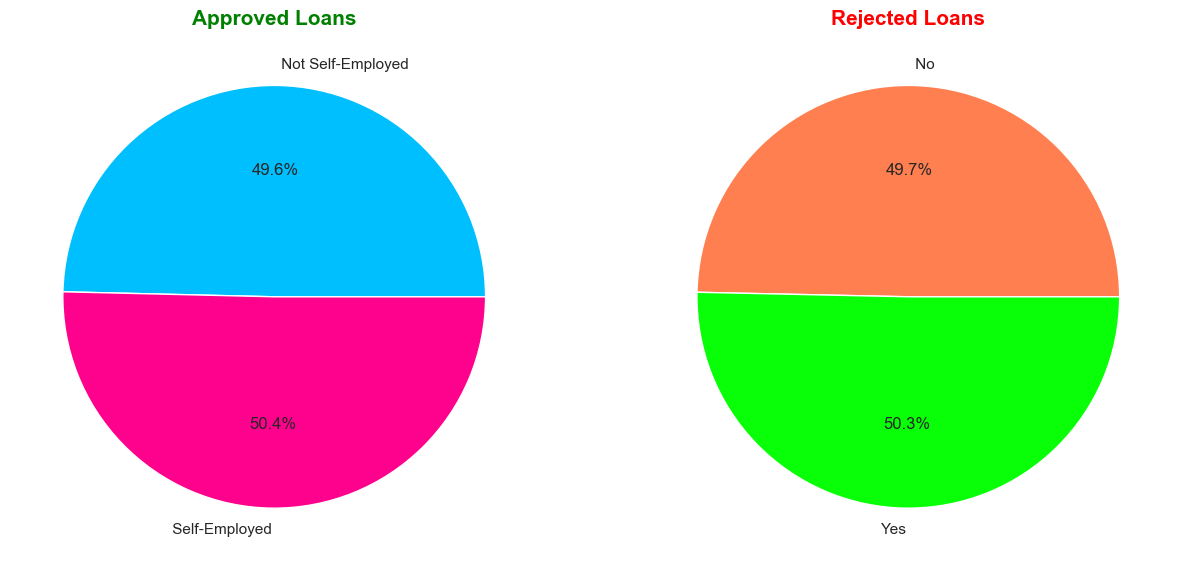

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10))

labels1 = lstapproved_labels
values1 = lstapproved_values
ax1.pie(values1,labels = labels1,autopct = '%1.1f%%',colors=['deepskyblue','xkcd:hot pink']) #plot first pie
ax1.set_title('Approved Loans',fontweight="bold",size=15,color='green')

labels2 = lstrejected_labels
values2 = lstrejected_values
ax2.pie(values2,labels = labels2,autopct = '%1.1f%%',colors=['coral','xkcd:fluorescent green']) #plot second pie
ax2.set_title('Rejected Loans',fontweight="bold",color="red",size=15)

In [43]:
df.shape

(4269, 13)

In [45]:
df_dependent=df.groupby([' no_of_dependents',' loan_status'])[' loan_status'].agg("count")

In [47]:
df_dependents_final=df_dependent.reset_index(name=' loan_status_count')

In [49]:
df_dependents_final

,no_of_dependents,loan_status,loan_status_count
0,0,Approved,457
1,0,Rejected,255
2,1,Approved,430
3,1,Rejected,267
4,2,Approved,441
5,2,Rejected,267
6,3,Approved,457
7,3,Rejected,270
8,4,Approved,465
9,4,Rejected,287


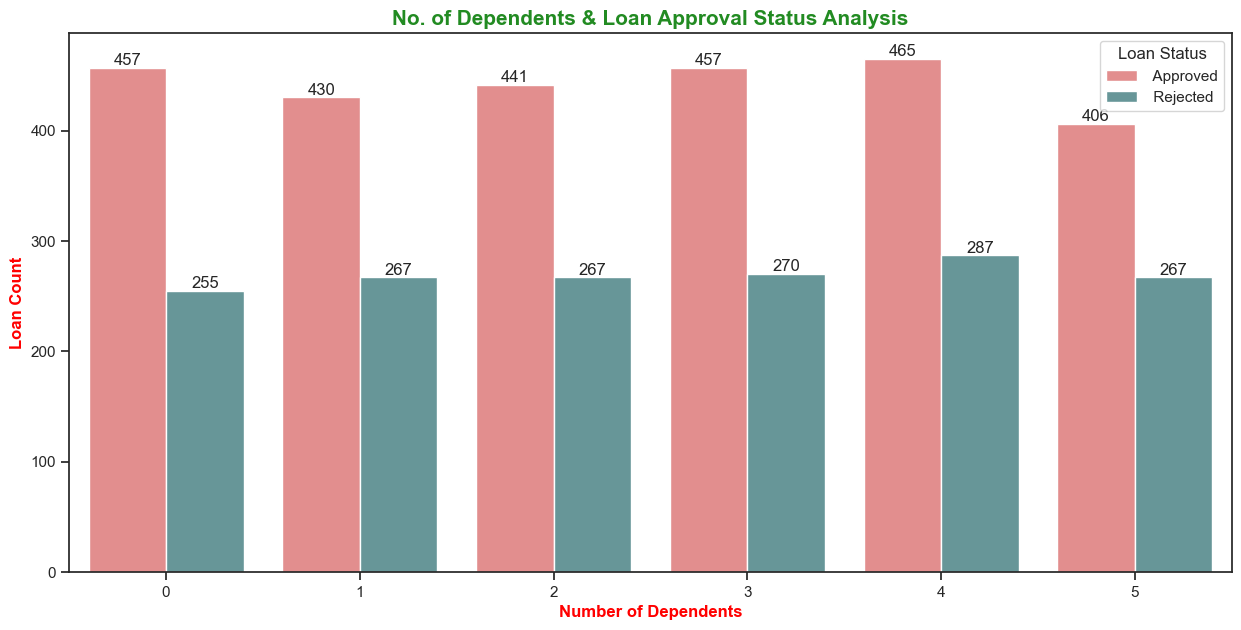

In [51]:
#plotting No. of Dependents & Loan Approval Status Analysis
sns.set_style("white")
sns.set_theme(style="ticks")
#sns.set_color_codes("bright")
palette_dependent = ["lightcoral", "cadetblue"]

plt.figure(figsize=(15,7))
ax=sns.barplot(x=' no_of_dependents',y=' loan_status_count',hue=' loan_status',data=df_dependents_final,palette=palette_dependent)
for container in ax.containers:
    ax.bar_label(container)

ax.set_xlabel("Number of Dependents",size=12,fontweight="bold",color="red")
ax.set_ylabel("Loan Count",size=12,fontweight="bold",color="red")

plt.title("No. of Dependents & Loan Approval Status Analysis",size=15,fontweight="bold",color="forestgreen")
plt.legend(title="Loan Status")
plt.show()

In [53]:
df_term_approved_cnt=df_approved.groupby([' loan_term'])[' loan_term'].agg("count")

In [55]:
df_term_approved_cnt_final=df_term_approved_cnt.reset_index(name="Cnt")

In [57]:
df_term_approved_cnt_final

,loan_term,Cnt
0,2,315
1,4,366
2,6,282
3,8,220
4,10,229
5,12,276
6,14,239
7,16,236
8,18,257
9,20,236


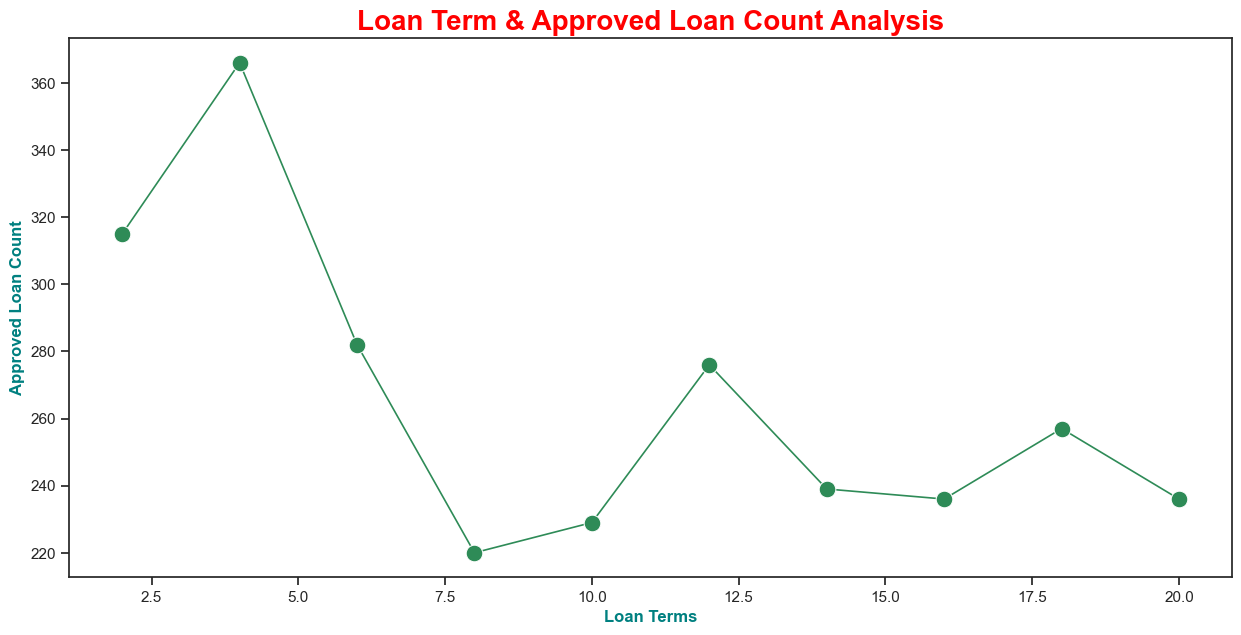

In [59]:
#plotting Loan Term & Approved Loan Count Analysis
sns.set_style("white")
sns.set_theme(style="ticks")
fig=plt.figure(figsize=(15,7))
line=sns.lineplot(x=" loan_term",y="Cnt",data=df_term_approved_cnt_final,marker="o",
                 color="seagreen",linewidth=1.2,markersize=12)

plt.title("Loan Term & Approved Loan Count Analysis",fontweight="bold",size=20,color="red")
plt.xlabel("Loan Terms",fontweight="bold",size=12,color="teal")
plt.ylabel("Approved Loan Count",fontweight="bold",size=12,color="teal")
plt.show() 

In [61]:
encoder=LabelEncoder()

s=df[' self_employed']
s

0         No
1        Yes
2         No
3         No
4        Yes
        ... 
4264     Yes
4265     Yes
4266      No
4267      No
4268      No
Name:  self_employed, Length: 4269, dtype: object

In [65]:
#Non-Self Employed = 0, self-employed=1
df[' self_employed']=encoder.fit_transform(s)


In [67]:
r=df[' education']
r

0            Graduate
1        Not Graduate
2            Graduate
3            Graduate
4        Not Graduate
            ...      
4264         Graduate
4265     Not Graduate
4266     Not Graduate
4267     Not Graduate
4268         Graduate
Name:  education, Length: 4269, dtype: object

In [69]:
#graduate=0, non graduate=1
df[' education']=encoder.fit_transform(r)

In [71]:
v=df[' loan_status']
v

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object

In [73]:
df[' loan_status']=encoder.fit_transform(v)

In [75]:
#dropping loan_id column
df.drop(['loan_id'],axis=1,inplace=True)

In [77]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


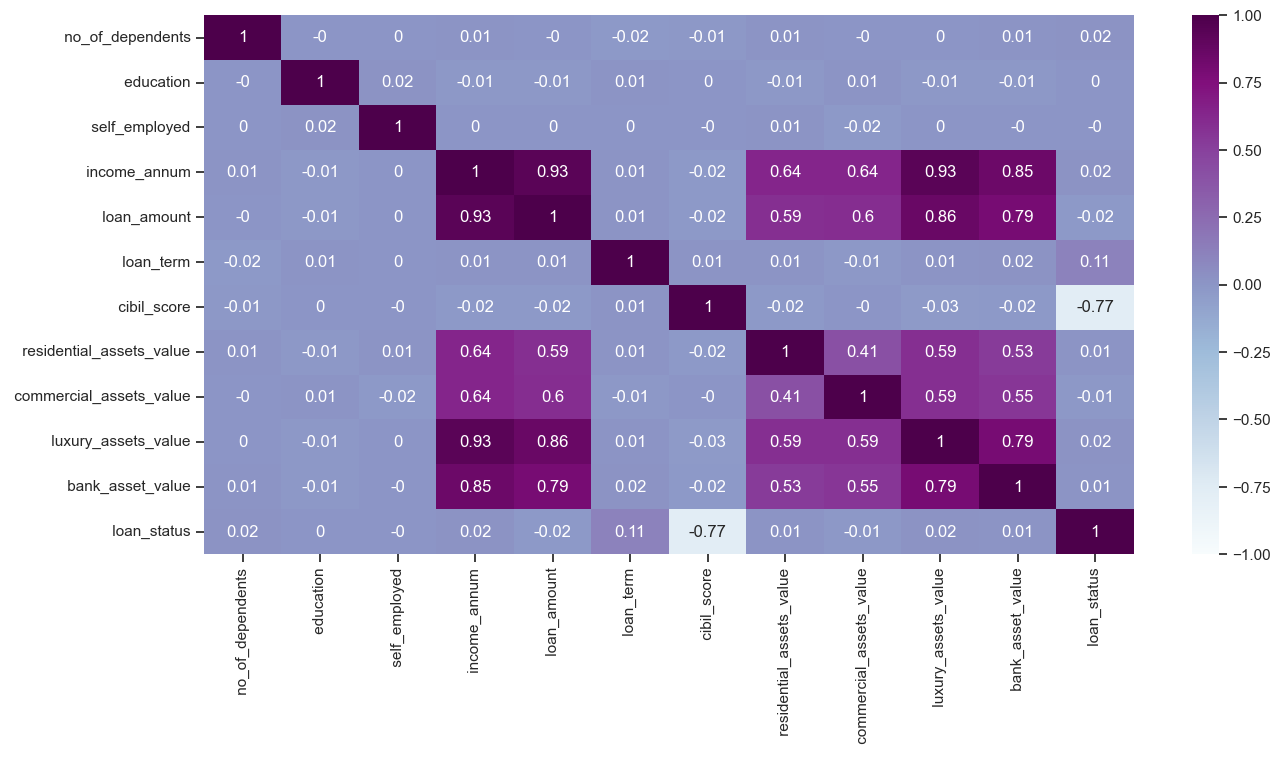

In [79]:
#plotting correlation matrix
plt.figure(figsize=(15,7))
sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1,center=0,cmap="BuPu")
plt.show()

In [81]:
df_RF=df.select_dtypes(['int','float'])

In [83]:
df_RF.head(4)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1


In [85]:
#defining features
X=df_RF.drop([' loan_status'],axis=1)
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [87]:
#defining target
y=df_RF.iloc[0:,-1]
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status, Length: 4269, dtype: int32

In [89]:
X.shape

(4269, 11)

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [93]:
cls=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)

In [95]:
cls=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)

In [97]:
cls.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [99]:
y_pred=cls.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(y_test, y_pred))

Confusion Matrix :
[[654   5]
 [ 11 398]]
Accuracy Score : 0.9850187265917603


In [103]:
IntAccuracy=accuracy_score(y_test,y_pred)
IntAccuracyFinal=IntAccuracy*100

In [ ]:
#sample tkinter GUI for loan approval/rejection prediction
from tkinter import *
from tkinter import ttk
from tkinter import messagebox

top=Tk()
top.geometry('700x700')
top.title("Loan Approval Prediction")

def funcLoanApproval():
    strEducation=cmbEducation.get()
    if(strEducation=='Graduate'):
        IntEducation=0
    else:
        IntEducation=1
    
    strSelfEmployed=cmbEmployment.get()
    if(strSelfEmployed=='No'):
        IntEmployed=0
    else:
        IntEmployed=1
    #print(IntEmployed)
    
    y_pred=cls.predict([[entDependent.get(),IntEducation,IntEmployed,entAnnualIncome.get(),
                        entLoanAmount.get(),entLoanTerm.get(),entCibilScore.get(),entResidentialAsset.get(),
                        entCommAsset.get(),entLuxeryAsset.get(),entBankAsset.get()]])
     
    if(y_pred==0):
        txtPredResult.insert(END,"Loan will be Approved")
    else:
        txtPredResult.insert(END,"Loan will be Rejected")
    
    strAccuracy='{0:.2f}'.format(IntAccuracyFinal),'%'
    txtModelAccuracy.insert(END,strAccuracy)

lblHeader=Label(top,text="Loan Approval Prediction",bg='orange', fg='white',font=('Verdana 20 bold'))
lblHeader.place(x=200,y=20)

lblDependent=Label(top,text="No. of Dependents",bg='orange', fg='white',font=('Verdana 10 bold'))
lblDependent.place(x=200,y=120)

entDependent=Entry(top,font=('Verdana 10'))
entDependent.place(x=360,y=120)

lblEducation=Label(top,text="Education",bg='orange', fg='white',font=('Verdana 10 bold'))
lblEducation.place(x=200,y=160)

lsEducation=['Graduate','Non-Graduate']
cmbEducation=ttk.Combobox(top,values=lsEducation)
cmbEducation.place(x=360,y=160)
cmbEducation.current(0)

lblEmployment=Label(top,text="Self Employed",bg='orange', fg='white',font=('Verdana 10 bold'))
lblEmployment.place(x=200,y=200)

lsEmployment=['Yes','No']
cmbEmployment=ttk.Combobox(top,values=lsEmployment)
cmbEmployment.place(x=360,y=200)
cmbEmployment.current(0)

lblAnnualIncome=Label(top,text="Annual Income",bg='orange', fg='white',font=('Verdana 10 bold'))
lblAnnualIncome.place(x=200,y=240)

entAnnualIncome=Entry(top,font=('Verdana 10'))
entAnnualIncome.place(x=360,y=240)

lblLoanAmount=Label(top,text="Loan Amount",bg='orange', fg='white',font=('Verdana 10 bold'))
lblLoanAmount.place(x=200,y=280)

entLoanAmount=Entry(top,font=('Verdana 10'))
entLoanAmount.place(x=360,y=280)

lblLoanTerm=Label(top,text="Loan Term",bg='orange', fg='white',font=('Verdana 10 bold'))
lblLoanTerm.place(x=200,y=320)

entLoanTerm=Entry(top,font=('Verdana 10'))
entLoanTerm.place(x=360,y=320)

lblCibilScore=Label(top,text="Cibil Score",bg='orange', fg='white',font=('Verdana 10 bold'))
lblCibilScore.place(x=200,y=360)

entCibilScore=Entry(top,font=('Verdana 10'))
entCibilScore.place(x=360,y=360)

lblResidentialAsset=Label(top,text="Residential Asset Value",bg='orange', fg='white',font=('Verdana 10 bold'))
lblResidentialAsset.place(x=200,y=400)

entResidentialAsset=Entry(top,font=('Verdana 10'))
entResidentialAsset.place(x=400,y=400)

lblCommAsset=Label(top,text="Commercial Asset Value",bg='orange', fg='white',font=('Verdana 10 bold'))
lblCommAsset.place(x=200,y=440)

entCommAsset=Entry(top,font=('Verdana 10'))
entCommAsset.place(x=400,y=440)

lblLuxeryAsset=Label(top,text="Luxary Asset Value",bg='orange', fg='white',font=('Verdana 10 bold'))
lblLuxeryAsset.place(x=200,y=480)

entLuxeryAsset=Entry(top,font=('Verdana 10'))
entLuxeryAsset.place(x=400,y=480)

lblBankAsset=Label(top,text="Bank Asset Value",bg='orange', fg='white',font=('Verdana 10 bold'))
lblBankAsset.place(x=200,y=520)

entBankAsset=Entry(top,font=('Verdana 10'))
entBankAsset.place(x=400,y=520)

btnSubmit=Button(top,text='Predict',bg='lime green',fg='white', font=('Verdana 12 bold'),command=lambda : funcLoanApproval())
btnSubmit.place(x=300,y=550)

lblPredResult=Label(top,text="Prediction Result",bg='orange', fg='white',font=('Verdana 10 bold'))
lblPredResult.place(x=200,y=590)

txtPredResult=Text(height=1,width=30,fg='black',font=('Verdana 10'))
txtPredResult.place(x=350,y=590)

lblModelAccuracy=Label(top,text="Prediction Model Accuracy",bg='orange', fg='white',font=('Verdana 10 bold'))
lblModelAccuracy.place(x=200,y=630)

txtModelAccuracy=Text(height=1,width=30,fg='black',font=('Verdana 10'))
txtModelAccuracy.place(x=400,y=630)

top.config(bg='pink')
top.mainloop()